In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import string
import spacy

from matplotlib.pyplot import imread
from wordcloud import WordCloud, STOPWORDS
%matplotlib inline

In [2]:
# Import extracted amazon reviews Dataset 
reviews=pd.read_csv('extract_reviews.csv')
reviews

,stars,comment
0,5.0 out of 5 stars,\n\n\n\n\n\n\n\n \n \n I have well resear...
1,5.0 out of 5 stars,\n\n\n\n\n\n\n\n \n \n Delivery was on ti...
2,4.0 out of 5 stars,\n\n\n\n\n\n\n\n \n \n It’s a cute collec...
3,1.0 out of 5 stars,\n\n\n\n\n\n\n\n \n \n Books are way to s...
4,5.0 out of 5 stars,\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n \n ...
...,...,...
1185,5.0 out of 5 stars,\n\n\n\n\n\n\n\n \n \n Nice it helps the ...
1186,5.0 out of 5 stars,\n\n\n\n\n\n\n\n \n \n Good\n \n
1187,5.0 out of 5 stars,\n\n\n\n\n\n\n\n \n \n On time delivery. ...
1188,5.0 out of 5 stars,\n\n\n\n\n\n\n\n \n \n My son loves to le...


## Text Preprocessing

In [4]:
reviews=[comment.strip() for comment in reviews.comment] # remove both the leading and the trailing characters
reviews=[comment for comment in reviews if comment] # removes empty strings, because they are considered in Python as False
reviews[0:10]

['I have well researched many books & concluded to this one.  I got it for 399 from amazon. Colors are just perfect. You might get feeling that books are small in size. But if you carefully research , all board books are of this size.Books are very well designed. Corners are kept rounded to avoid accidental hurting to your baby. Content is well researched as well... What more!',
 'Delivery was on time packaging was excellent the Board books are of superb quality came in a card bird box there are 10 books each of which is very nice in terms of quality and colour go for it your baby’s will love it',
 'It’s a cute collection, but I wasn’t expexting the size of the book to be this small . But still the books are awesome.  Have 12 leaflets in all the book',
 'Books are way to small for a child to learn. Because a 1 or 2 year old child needs to see bigger pictures in order to understand everything. One should buy individual books rather than this library. A big no this.Hope you all find this

In [5]:
# Joining the list into one string/text
reviews_text=' '.join(reviews)
reviews_text

'I have well researched many books & concluded to this one.  I got it for 399 from amazon. Colors are just perfect. You might get feeling that books are small in size. But if you carefully research , all board books are of this size.Books are very well designed. Corners are kept rounded to avoid accidental hurting to your baby. Content is well researched as well... What more! Delivery was on time packaging was excellent the Board books are of superb quality came in a card bird box there are 10 books each of which is very nice in terms of quality and colour go for it your baby’s will love it It’s a cute collection, but I wasn’t expexting the size of the book to be this small . But still the books are awesome.  Have 12 leaflets in all the book Books are way to small for a child to learn. Because a 1 or 2 year old child needs to see bigger pictures in order to understand everything. One should buy individual books rather than this library. A big no this.Hope you all find this helpful! The

In [6]:
# Remove Punctuations 
no_punc_text=reviews_text.translate(str.maketrans('','',string.punctuation))
no_punc_text

'I have well researched many books  concluded to this one  I got it for 399 from amazon Colors are just perfect You might get feeling that books are small in size But if you carefully research  all board books are of this sizeBooks are very well designed Corners are kept rounded to avoid accidental hurting to your baby Content is well researched as well What more Delivery was on time packaging was excellent the Board books are of superb quality came in a card bird box there are 10 books each of which is very nice in terms of quality and colour go for it your baby’s will love it It’s a cute collection but I wasn’t expexting the size of the book to be this small  But still the books are awesome  Have 12 leaflets in all the book Books are way to small for a child to learn Because a 1 or 2 year old child needs to see bigger pictures in order to understand everything One should buy individual books rather than this library A big no thisHope you all find this helpful The media could not be l

In [7]:
# Tokenization
import nltk
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\admine\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\admine\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [8]:
from nltk import word_tokenize
text_tokens=word_tokenize(no_punc_text)
print(text_tokens[0:50])

['I', 'have', 'well', 'researched', 'many', 'books', 'concluded', 'to', 'this', 'one', 'I', 'got', 'it', 'for', '399', 'from', 'amazon', 'Colors', 'are', 'just', 'perfect', 'You', 'might', 'get', 'feeling', 'that', 'books', 'are', 'small', 'in', 'size', 'But', 'if', 'you', 'carefully', 'research', 'all', 'board', 'books', 'are', 'of', 'this', 'sizeBooks', 'are', 'very', 'well', 'designed', 'Corners', 'are', 'kept']


In [9]:
len(text_tokens)

28663

In [10]:
# Remove stopwords
from nltk.corpus import stopwords
my_stop_words=stopwords.words('english')

sw_list=['I','The','It','A']
my_stop_words.extend(sw_list)

no_stop_tokens=[word for word in text_tokens if not word in my_stop_words]
print(no_stop_tokens)

['well', 'researched', 'many', 'books', 'concluded', 'one', 'got', '399', 'amazon', 'Colors', 'perfect', 'You', 'might', 'get', 'feeling', 'books', 'small', 'size', 'But', 'carefully', 'research', 'board', 'books', 'sizeBooks', 'well', 'designed', 'Corners', 'kept', 'rounded', 'avoid', 'accidental', 'hurting', 'baby', 'Content', 'well', 'researched', 'well', 'What', 'Delivery', 'time', 'packaging', 'excellent', 'Board', 'books', 'superb', 'quality', 'came', 'card', 'bird', 'box', '10', 'books', 'nice', 'terms', 'quality', 'colour', 'go', 'baby', '’', 'love', '’', 'cute', 'collection', '’', 'expexting', 'size', 'book', 'small', 'But', 'still', 'books', 'awesome', 'Have', '12', 'leaflets', 'book', 'Books', 'way', 'small', 'child', 'learn', 'Because', '1', '2', 'year', 'old', 'child', 'needs', 'see', 'bigger', 'pictures', 'order', 'understand', 'everything', 'One', 'buy', 'individual', 'books', 'rather', 'library', 'big', 'thisHope', 'find', 'helpful', 'media', 'could', 'loaded', 'excelle

In [11]:
# Normalize the data
lower_words=[comment.lower() for comment in no_stop_tokens]
print(lower_words)

['well', 'researched', 'many', 'books', 'concluded', 'one', 'got', '399', 'amazon', 'colors', 'perfect', 'you', 'might', 'get', 'feeling', 'books', 'small', 'size', 'but', 'carefully', 'research', 'board', 'books', 'sizebooks', 'well', 'designed', 'corners', 'kept', 'rounded', 'avoid', 'accidental', 'hurting', 'baby', 'content', 'well', 'researched', 'well', 'what', 'delivery', 'time', 'packaging', 'excellent', 'board', 'books', 'superb', 'quality', 'came', 'card', 'bird', 'box', '10', 'books', 'nice', 'terms', 'quality', 'colour', 'go', 'baby', '’', 'love', '’', 'cute', 'collection', '’', 'expexting', 'size', 'book', 'small', 'but', 'still', 'books', 'awesome', 'have', '12', 'leaflets', 'book', 'books', 'way', 'small', 'child', 'learn', 'because', '1', '2', 'year', 'old', 'child', 'needs', 'see', 'bigger', 'pictures', 'order', 'understand', 'everything', 'one', 'buy', 'individual', 'books', 'rather', 'library', 'big', 'thishope', 'find', 'helpful', 'media', 'could', 'loaded', 'excelle

In [12]:
# Stemming 
from nltk.stem import PorterStemmer
ps=PorterStemmer()
stemmed_tokens=[ps.stem(word) for word in lower_words]
print(stemmed_tokens)

['well', 'research', 'mani', 'book', 'conclud', 'one', 'got', '399', 'amazon', 'color', 'perfect', 'you', 'might', 'get', 'feel', 'book', 'small', 'size', 'but', 'care', 'research', 'board', 'book', 'sizebook', 'well', 'design', 'corner', 'kept', 'round', 'avoid', 'accident', 'hurt', 'babi', 'content', 'well', 'research', 'well', 'what', 'deliveri', 'time', 'packag', 'excel', 'board', 'book', 'superb', 'qualiti', 'came', 'card', 'bird', 'box', '10', 'book', 'nice', 'term', 'qualiti', 'colour', 'go', 'babi', '’', 'love', '’', 'cute', 'collect', '’', 'expext', 'size', 'book', 'small', 'but', 'still', 'book', 'awesom', 'have', '12', 'leaflet', 'book', 'book', 'way', 'small', 'child', 'learn', 'becaus', '1', '2', 'year', 'old', 'child', 'need', 'see', 'bigger', 'pictur', 'order', 'understand', 'everyth', 'one', 'buy', 'individu', 'book', 'rather', 'librari', 'big', 'thishop', 'find', 'help', 'media', 'could', 'load', 'excel', 'set', 'initi', 'basic', 'thing', 'child', 'learn', 'got', 'mult

In [13]:
# Lemmatization
nlp=spacy.load('en_core_web_sm')
doc=nlp(' '.join(lower_words))
print(doc)

well researched many books concluded one got 399 amazon colors perfect you might get feeling books small size but carefully research board books sizebooks well designed corners kept rounded avoid accidental hurting baby content well researched well what delivery time packaging excellent board books superb quality came card bird box 10 books nice terms quality colour go baby ’ love ’ cute collection ’ expexting size book small but still books awesome have 12 leaflets book books way small child learn because 1 2 year old child needs see bigger pictures order understand everything one buy individual books rather library big thishope find helpful media could loaded excellent set initial basic things child learn got multiple pages also inside book really impressed however wait little buy books child six months old every thing trying eat book well 🙆🏻‍♀️🙆🏻‍♀️🙆🏻‍♀️ but keeping box anyways 🤷🏻‍♀️🙋🏻‍♀️💁🏻‍♀️ really liked books my 4 month old baby really likes see images also travel friendly prefer

In [14]:
lemmas=[token.lemma_ for token in doc]
print(lemmas)

['well', 'research', 'many', 'book', 'conclude', 'one', 'get', '399', 'amazon', 'color', 'perfect', 'you', 'might', 'get', 'feel', 'book', 'small', 'size', 'but', 'carefully', 'research', 'board', 'book', 'sizebook', 'well', 'design', 'corner', 'keep', 'round', 'avoid', 'accidental', 'hurt', 'baby', 'content', 'well', 'research', 'well', 'what', 'delivery', 'time', 'packaging', 'excellent', 'board', 'books', 'superb', 'quality', 'come', 'card', 'bird', 'box', '10', 'book', 'nice', 'term', 'quality', 'colour', 'go', 'baby', "'", 'love', "'", 'cute', 'collection', "'", 'expexte', 'size', 'book', 'small', 'but', 'still', 'book', 'awesome', 'have', '12', 'leaflet', 'book', 'book', 'way', 'small', 'child', 'learn', 'because', '1', '2', 'year', 'old', 'child', 'need', 'see', 'big', 'picture', 'order', 'understand', 'everything', 'one', 'buy', 'individual', 'book', 'rather', 'library', 'big', 'thishope', 'find', 'helpful', 'medium', 'could', 'load', 'excellent', 'set', 'initial', 'basic', 'th

In [15]:
clean_reviews=' '.join(lemmas)
clean_reviews

"well research many book conclude one get 399 amazon color perfect you might get feel book small size but carefully research board book sizebook well design corner keep round avoid accidental hurt baby content well research well what delivery time packaging excellent board books superb quality come card bird box 10 book nice term quality colour go baby ' love ' cute collection ' expexte size book small but still book awesome have 12 leaflet book book way small child learn because 1 2 year old child need see big picture order understand everything one buy individual book rather library big thishope find helpful medium could load excellent set initial basic thing child learn get multiple page also inside book really impressed however wait little buy book child six month old every thing try eat book well 🙆 🏻\u200d ♀ ️ 🙆 🏻\u200d ♀ ️ 🙆 🏻\u200d ♀ ️ but keep box anyways 🤷 🏻\u200d ♀ ️ 🙋 🏻\u200d ♀ ️ 💁 🏻\u200d ♀ ️ really like book my 4 month old baby really like see image also travel friendly pr

## Feature Extaction

### 1. Using CountVectorizer

In [16]:
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer()
reviewscv=cv.fit_transform(lemmas)

In [17]:
print(cv.vocabulary_)

{'well': 2291, 'research': 1816, 'many': 1335, 'book': 335, 'conclude': 541, 'one': 1501, 'get': 900, '399': 68, 'amazon': 176, 'color': 502, 'perfect': 1578, 'you': 2362, 'might': 1363, 'feel': 828, 'small': 1942, 'size': 1919, 'but': 408, 'carefully': 436, 'board': 330, 'sizebook': 1923, 'design': 642, 'corner': 568, 'keep': 1191, 'round': 1834, 'avoid': 247, 'accidental': 116, 'hurt': 1067, 'baby': 260, 'content': 554, 'what': 2298, 'delivery': 631, 'time': 2139, 'packaging': 1544, 'excellent': 781, 'books': 352, 'superb': 2046, 'quality': 1721, 'come': 519, 'card': 431, 'bird': 319, 'box': 388, '10': 0, 'nice': 1443, 'term': 2079, 'colour': 507, 'go': 918, 'love': 1315, 'cute': 602, 'collection': 496, 'expexte': 795, 'still': 2016, 'awesome': 251, 'have': 1014, '12': 9, 'leaflet': 1249, 'way': 2281, 'child': 467, 'learn': 1253, 'because': 292, 'year': 2352, 'old': 1497, 'need': 1429, 'see': 1867, 'big': 312, 'picture': 1598, 'order': 1518, 'understand': 2204, 'everything': 772, 'bu

In [18]:
print(cv.get_feature_names()[150:300])

['aid', 'airplane', 'al', 'alfabet', 'all', 'allclear', 'allhe', 'allow', 'allworth', 'almost', 'alone', 'along', 'alot', 'alphabet', 'alphabetsthe', 'already', 'also', 'alternative', 'although', 'always', 'alwaysdelivere', 'amaze', 'amazed', 'amazing', 'amazingi', 'amazingly', 'amazon', 'amazone', 'american', 'amlost', 'amount', 'and', 'animal', 'animalsbird', 'animalsfruitsvegetable', 'animate', 'anither', 'another', 'ant', 'any', 'anything', 'anyway', 'anyways', 'anywhere', 'apart', 'apartwhen', 'apko', 'appeal', 'appear', 'appearance', 'appel', 'apple', 'apply', 'appreciate', 'apprehensive', 'appropriate', 'apt', 'aptly', 'area', 'around', 'aroundlovely', 'aroundother', 'arrange', 'arrangment', 'arrival', 'arrive', 'article', 'as', 'aside', 'ask', 'aso', 'assemble', 'asset', 'assorted', 'assume', 'assumed', 'at', 'ate', 'atleast', 'attach', 'attention', 'atteractive', 'attract', 'attractive', 'attractiveeasy', 'attractivequality', 'atttactive', 'audience', 'authentic', 'autism', 'a

In [19]:
print(reviewscv.toarray()[150:300])

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [20]:
print(reviewscv.toarray().shape)

(17599, 2429)


### 2. CountVectorizer with N-grams (Bigrams & Trigrams)

In [22]:
cv_ngram_range=CountVectorizer(analyzer='word',ngram_range=(1,3),max_features=100)
bow_matrix_ngram=cv_ngram_range.fit_transform(lemmas)

In [23]:
print(cv_ngram_range.get_feature_names())
print(bow_matrix_ngram.toarray())

['10', 'also', 'amazing', 'amazon', 'animal', 'attractive', 'awesome', 'baby', 'big', 'bit', 'board', 'book', 'box', 'buy', 'can', 'child', 'clear', 'collection', 'color', 'colour', 'colourful', 'content', 'could', 'daughter', 'do', 'easily', 'easy', 'enjoy', 'excellent', 'first', 'get', 'gift', 'give', 'go', 'good', 'great', 'hand', 'happy', 'hard', 'he', 'hold', 'image', 'its', 'keep', 'kid', 'learn', 'library', 'like', 'little', 'look', 'lot', 'love', 'make', 'many', 'material', 'money', 'month', 'much', 'must', 'my', 'nice', 'not', 'old', 'one', 'page', 'paper', 'perfect', 'picture', 'play', 'price', 'print', 'product', 'purchase', 'quality', 'read', 'really', 'recommend', 'see', 'set', 'she', 'show', 'size', 'small', 'son', 'start', 'tear', 'they', 'thick', 'thing', 'this', 'time', 'toddler', 'use', 'useful', 'value', 'very', 'well', 'worth', 'would', 'year']
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


### 3. TF-IDF Vectorizer

In [24]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidfv_ngram_max_features=TfidfVectorizer(norm='l2',analyzer='word',ngram_range=(1,3),max_features=500)
tfidf_matrix_ngram=tfidfv_ngram_max_features.fit_transform(lemmas)

In [25]:
print(tfidfv_ngram_max_features.get_feature_names())
print(tfidf_matrix_ngram.toarray())

['10', '100', '10month', '12', '13', '14', '15', '16', '18', '1st', '1year', '20', '23', '25', '399', '400', '499', 'abc', 'able', 'absolutely', 'accord', 'actual', 'actually', 'adult', 'affordable', 'age', 'ahead', 'all', 'almost', 'alphabet', 'already', 'also', 'always', 'amazing', 'amazon', 'and', 'animal', 'apart', 'appropriate', 'apt', 'around', 'arrive', 'as', 'ask', 'at', 'atleast', 'attach', 'attention', 'attract', 'attractive', 'avoid', 'away', 'awesome', 'baby', 'back', 'background', 'bad', 'basic', 'be', 'beautiful', 'begin', 'beginner', 'believe', 'big', 'bind', 'bird', 'birthday', 'bit', 'bite', 'board', 'book', 'books', 'box', 'boy', 'bright', 'bring', 'build', 'but', 'buy', 'buying', 'can', 'card', 'cardboard', 'carry', 'case', 'change', 'check', 'chew', 'child', 'children', 'choice', 'choose', 'clean', 'clear', 'cm', 'collection', 'color', 'colorful', 'colour', 'colourful', 'come', 'common', 'compact', 'compare', 'complete', 'condition', 'contain', 'content', 'corner', 

## Generate Word Cloud

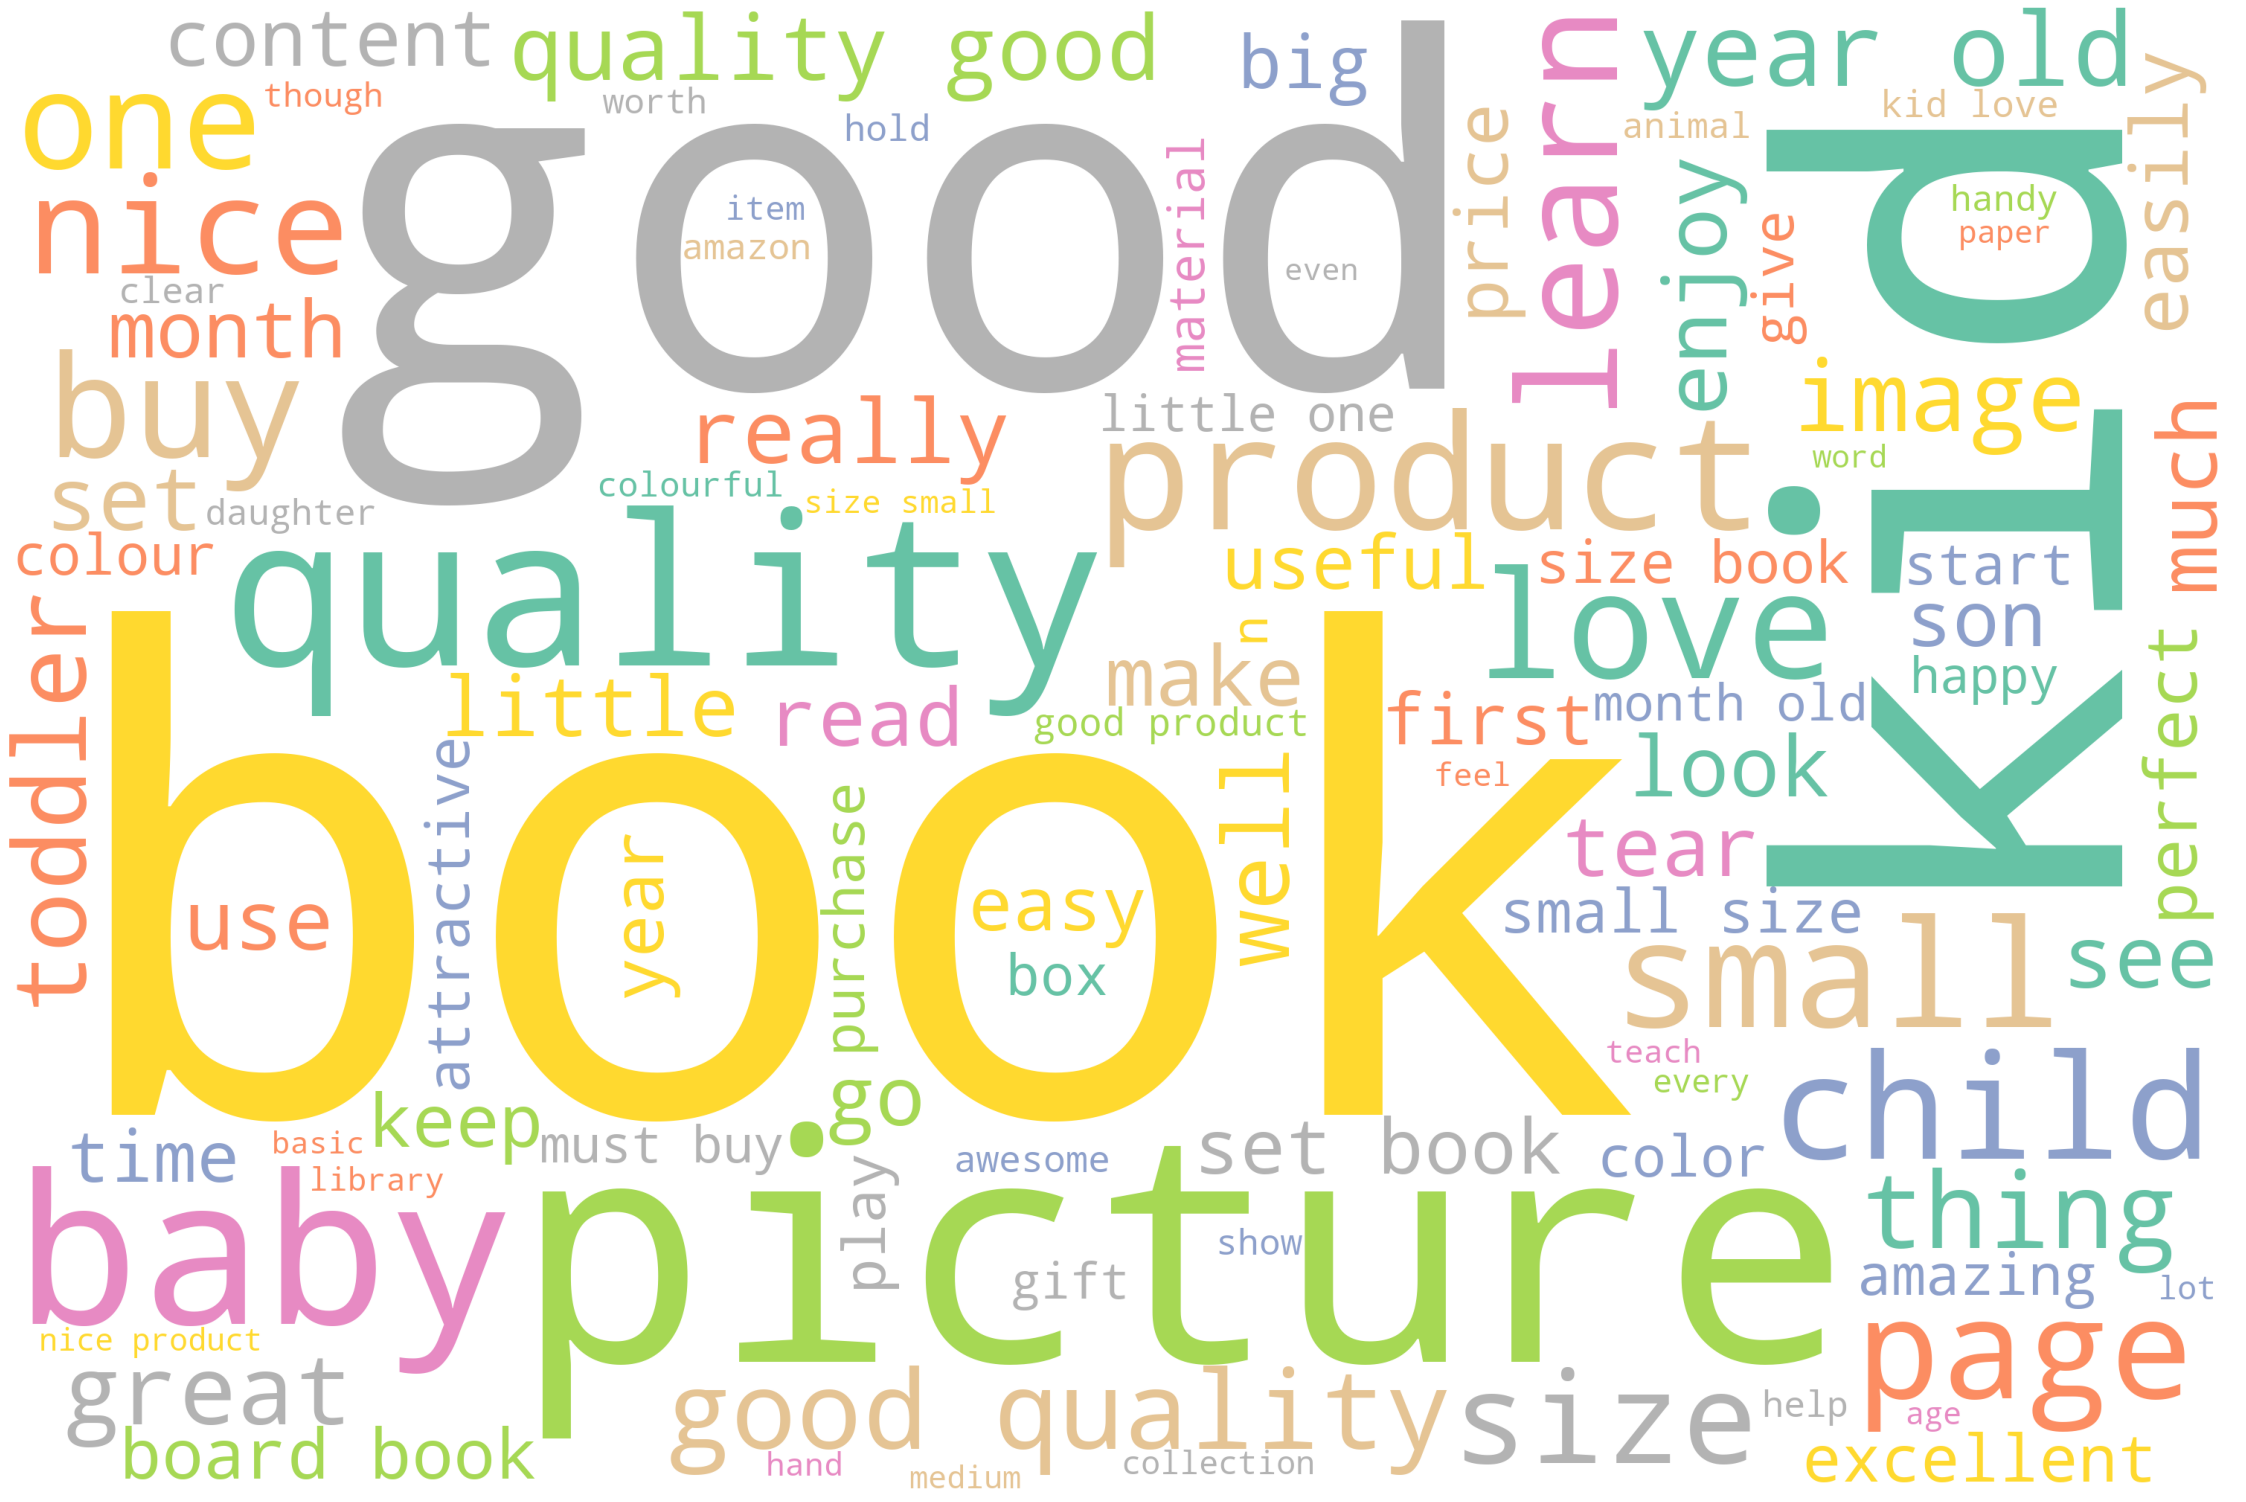

In [26]:
# Define a function to plot word cloud
def plot_cloud(wordcloud):
    plt.figure(figsize=(40,30))
    plt.imshow(wordcloud)
    plt.axis('off')

# Generate word cloud

STOPWORDS.add('Pron')
wordcloud=WordCloud(width=3000,height=2000,background_color='white',max_words=100,
                   colormap='Set2',stopwords=STOPWORDS).generate(clean_reviews)
plot_cloud(wordcloud)

## Named Entity Recognition (NER)

In [27]:
# Parts of speech (POS) tagging
nlp=spacy.load('en_core_web_sm')

one_block=clean_reviews
doc_block=nlp(one_block)
spacy.displacy.render(doc_block,style='ent',jupyter=True)

In [28]:
for token in doc_block[100:200]:
    print(token,token.pos_)

big ADJ
thishope NOUN
find VERB
helpful ADJ
medium NOUN
could AUX
load VERB
excellent ADJ
set VERB
initial ADJ
basic ADJ
thing NOUN
child NOUN
learn VERB
get VERB
multiple ADJ
page NOUN
also ADV
inside ADP
book NOUN
really ADV
impressed ADJ
however ADV
wait VERB
little ADJ
buy NOUN
book NOUN
child NOUN
six NUM
month NOUN
old ADJ
every DET
thing NOUN
try VERB
eat VERB
book NOUN
well INTJ
🙆 PROPN
🏻‍ PROPN
♀ PROPN
️ NOUN
🙆 PROPN
🏻‍ PROPN
♀ PROPN
️ NOUN
🙆 PROPN
🏻‍ PROPN
♀ PROPN
️ NOUN
but CCONJ
keep VERB
box NOUN
anyways ADV
🤷 PROPN
🏻‍ PROPN
♀ PROPN
️ NOUN
🙋 PROPN
🏻‍ PROPN
♀ PROPN
️ NOUN
💁 PROPN
🏻‍ PROPN
♀ PROPN
️ PROPN
really ADV
like ADP
book INTJ
my PRON
4 NUM
month NOUN
old ADJ
baby NOUN
really ADV
like INTJ
see VERB
image NOUN
also ADV
travel VERB
friendly ADJ
prefer NOUN
show NOUN
book NOUN
rather ADV
engage VERB
mobile ADJ
phone NOUN
love NOUN
product NOUN
muchmaybe ADV
15 NUM
year NOUN
old ADJ
daughter NOUN
😜 PROPN
😁 NOUN
of ADP
course NOUN
love VERB
itthe DET


In [29]:
# Filtering the nouns and verbs only
nouns_verbs=[token.text for token in doc_block if token.pos_ in ('NOUN','VERB')]
print(nouns_verbs[100:200])

['book', 'buy', 'writing', 'review', 'month', 'usage', 'build', 'board', 'book', 'son', 'abuse', 'length', 'bend', 'son', 'chew', 'water', 'stand', 'try', 'press', 'binding', 'run', 'book', 'seem', 'water', 'water', 'proof', 'come', 'content', 'son', 'lot', 'month', 'tip', 'read', 'book', 'kid', 'atleast', 'min', 'day', 'develop', 'glance', 'reading', 'board', 'book', 'purchase', 'read', 'space', 'recommend', 'buy', 'set', 'engage', 'baby', 'size', 'baby', 'hold', 'page', 'engross', 'variety', 'topic', 'board', 'book', 'baby', 'hold', 'worry', 'page', 'category', 'picture', 'interest', 'kid', 'go', 'buy', 'year', 'boy', 'love', 'book', 'read', 'get', 'look', 'book', 'transport', 'book', 'learn', 'recognize', 'thing', 'distraction', 'book', 'tear', 'bend', 'edge', 'hurt', 'child', 'image', 'page', 'topic', 'lot', 'learn', 'pocket', 'size', 'carry', 'set', 'book']


In [30]:
# Counting the noun & verb tokens
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer()

X=cv.fit_transform(nouns_verbs)
sum_words=X.sum(axis=0)

words_freq=[(word,sum_words[0,idx]) for word,idx in cv.vocabulary_.items()]
words_freq=sorted(words_freq,key=lambda x: x[1],reverse=True)

wd_df=pd.DataFrame(words_freq)
wd_df.columns=['word','count']
wd_df[0:10] # viewing top ten results

,word,count
0,book,905
1,quality,366
2,kid,315
3,love,227
4,product,226
5,size,222
6,picture,220
7,baby,215
8,buy,176
9,page,170


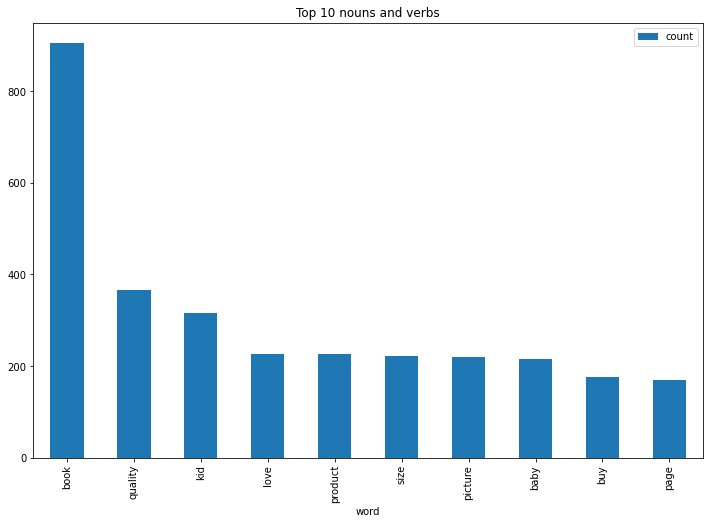

In [31]:
# Visualizing results (Barchart for top 10 nouns + verbs)
wd_df[0:10].plot.bar(x='word',figsize=(12,8),title='Top 10 nouns and verbs');

## Emotion Mining - Sentiment Analysis

In [32]:
from nltk import tokenize
sentences=tokenize.sent_tokenize(' '.join(reviews))
sentences

['I have well researched many books & concluded to this one.',
 'I got it for 399 from amazon.',
 'Colors are just perfect.',
 'You might get feeling that books are small in size.',
 'But if you carefully research , all board books are of this size.Books are very well designed.',
 'Corners are kept rounded to avoid accidental hurting to your baby.',
 'Content is well researched as well... What more!',
 'Delivery was on time packaging was excellent the Board books are of superb quality came in a card bird box there are 10 books each of which is very nice in terms of quality and colour go for it your baby’s will love it It’s a cute collection, but I wasn’t expexting the size of the book to be this small .',
 'But still the books are awesome.',
 'Have 12 leaflets in all the book Books are way to small for a child to learn.',
 'Because a 1 or 2 year old child needs to see bigger pictures in order to understand everything.',
 'One should buy individual books rather than this library.',
 'A 

In [33]:
sent_df=pd.DataFrame(sentences,columns=['sentence'])
sent_df

,sentence
0,I have well researched many books & concluded ...
1,I got it for 399 from amazon.
2,Colors are just perfect.
3,You might get feeling that books are small in ...
4,"But if you carefully research , all board book..."
...,...
2090,Must buy Every parents should buy this awesome...
2091,The material is sturdy and the thought and con...
2092,"Books are small, compact and portable.Loved th..."
2093,My son loves to learn frm it The paper quality...


In [42]:
# Emotion Lexicon - Affin
affin=pd.read_csv('Afinn.csv',sep=',',encoding='Latin-1')
affin

,word,value
0,abandon,-2
1,abandoned,-2
2,abandons,-2
3,abducted,-2
4,abduction,-2
...,...,...
2472,yucky,-2
2473,yummy,3
2474,zealot,-2
2475,zealots,-2


In [43]:
affinity_scores=affin.set_index('word')['value'].to_dict()
affinity_scores

{'abandon': -2,
 'abandoned': -2,
 'abandons': -2,
 'abducted': -2,
 'abduction': -2,
 'abductions': -2,
 'abhor': -3,
 'abhorred': -3,
 'abhorrent': -3,
 'abhors': -3,
 'abilities': 2,
 'ability': 2,
 'aboard': 1,
 'absentee': -1,
 'absentees': -1,
 'absolve': 2,
 'absolved': 2,
 'absolves': 2,
 'absolving': 2,
 'absorbed': 1,
 'abuse': -3,
 'abused': -3,
 'abuses': -3,
 'abusive': -3,
 'accept': 1,
 'accepted': 1,
 'accepting': 1,
 'accepts': 1,
 'accident': -2,
 'accidental': -2,
 'accidentally': -2,
 'accidents': -2,
 'accomplish': 2,
 'accomplished': 2,
 'accomplishes': 2,
 'accusation': -2,
 'accusations': -2,
 'accuse': -2,
 'accused': -2,
 'accuses': -2,
 'accusing': -2,
 'ache': -2,
 'achievable': 1,
 'aching': -2,
 'acquit': 2,
 'acquits': 2,
 'acquitted': 2,
 'acquitting': 2,
 'acrimonious': -3,
 'active': 1,
 'adequate': 1,
 'admire': 3,
 'admired': 3,
 'admires': 3,
 'admiring': 3,
 'admit': -1,
 'admits': -1,
 'admitted': -1,
 'admonish': -2,
 'admonished': -2,
 'adopt': 

In [44]:
# Custom function: score each word in a sentence in lemmatised form, but calculate the score for the whole original sentence
nlp=spacy.load('en_core_web_sm')
sentiment_lexicon=affinity_scores

def calculate_sentiment(text:str=None):
    sent_score=0
    if text:
        sentence=nlp(text)
        for word in sentence:
            sent_score+=sentiment_lexicon.get(word.lemma_,0)
    return sent_score

In [45]:
# manual testing
calculate_sentiment(text='good service')

3

In [46]:
# Calculating sentiment value for each sentence
sent_df['sentiment_value']=sent_df['sentence'].apply(calculate_sentiment)
sent_df['sentiment_value']

0        0
1        0
2        3
3        0
4        2
        ..
2090    28
2091     4
2092     3
2093     6
2094     2
Name: sentiment_value, Length: 2095, dtype: int64

In [47]:
sent_df['word_count']=sent_df['sentence'].str.split().apply(len)
sent_df['word_count']

0       11
1        7
2        4
3       10
4       17
        ..
2090    69
2091    19
2092     8
2093    18
2094     4
Name: word_count, Length: 2095, dtype: int64

In [48]:
sent_df.sort_values(by='sentiment_value')

,sentence,sentiment_value,word_count
818,No worry of these getting torn or damage if yo...,-7,19
426,He can roughly use it without a worry of damage.,-6,10
146,This are pocket books.Wrong way to sell item b...,-6,35
299,The finish overall is poor Size of book is sma...,-6,42
39,Palm sized board books for babies .. easy to h...,-5,16
...,...,...,...
2066,Very usefull for infants Good and handy Good f...,25,46
1803,Overall a good purchase Just opened the box of...,25,39
2012,"Very good build quality is great, clear pictur...",26,65
2090,Must buy Every parents should buy this awesome...,28,69


In [49]:
sent_df['sentiment_value'].describe()

count    2095.000000
mean        2.786158
std         3.618653
min        -7.000000
25%         0.000000
50%         2.000000
75%         3.000000
max        30.000000
Name: sentiment_value, dtype: float64

In [50]:
sent_df[sent_df['sentiment_value']<=0]

,sentence,sentiment_value,word_count
0,I have well researched many books & concluded ...,0,11
1,I got it for 399 from amazon.,0,7
3,You might get feeling that books are small in ...,0,10
5,Corners are kept rounded to avoid accidental h...,-5,11
6,Content is well researched as well... What more!,0,8
...,...,...,...
2079,Thick board pages makes it durable.,0,6
2080,Purchased at Rs 429.,0,4
2083,Product delivered on time.,0,4
2087,Small but this is enough for our kids.,0,8


In [51]:
sent_df[sent_df['sentiment_value']>0]

,sentence,sentiment_value,word_count
2,Colors are just perfect.,3,4
4,"But if you carefully research , all board book...",2,17
7,Delivery was on time packaging was excellent t...,16,62
8,But still the books are awesome.,4,6
10,Because a 1 or 2 year old child needs to see b...,1,18
...,...,...,...
2090,Must buy Every parents should buy this awesome...,28,69
2091,The material is sturdy and the thought and con...,4,19
2092,"Books are small, compact and portable.Loved th...",3,8
2093,My son loves to learn frm it The paper quality...,6,18


In [52]:
# Adding index cloumn
sent_df['index']=range(0,len(sent_df))
sent_df

,sentence,sentiment_value,word_count,index
0,I have well researched many books & concluded ...,0,11,0
1,I got it for 399 from amazon.,0,7,1
2,Colors are just perfect.,3,4,2
3,You might get feeling that books are small in ...,0,10,3
4,"But if you carefully research , all board book...",2,17,4
...,...,...,...,...
2090,Must buy Every parents should buy this awesome...,28,69,2090
2091,The material is sturdy and the thought and con...,4,19,2091
2092,"Books are small, compact and portable.Loved th...",3,8,2092
2093,My son loves to learn frm it The paper quality...,6,18,2093


C:\Users\admine\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='sentiment_value', ylabel='Density'>

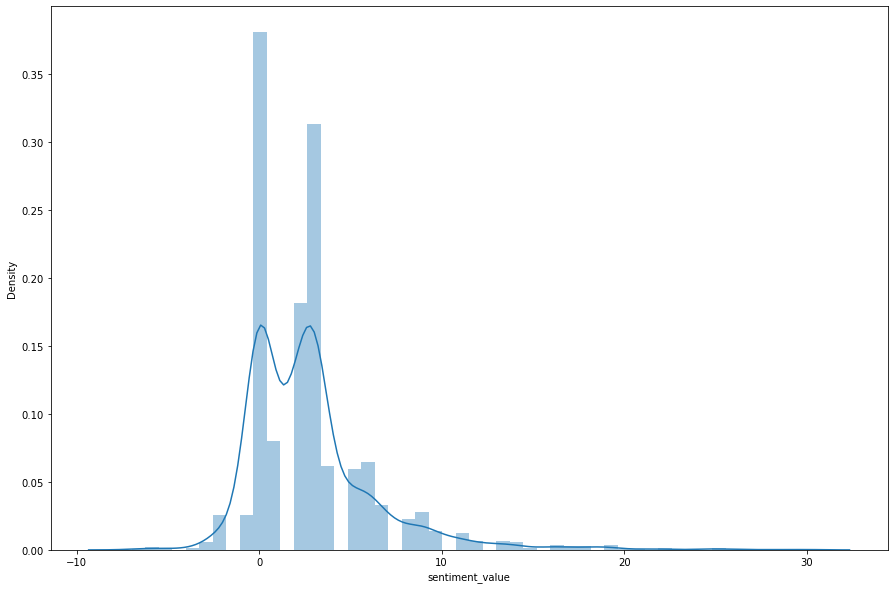

In [53]:
import seaborn as sns
plt.figure(figsize=(15,10))
sns.distplot(sent_df['sentiment_value'])

<AxesSubplot:xlabel='index', ylabel='sentiment_value'>

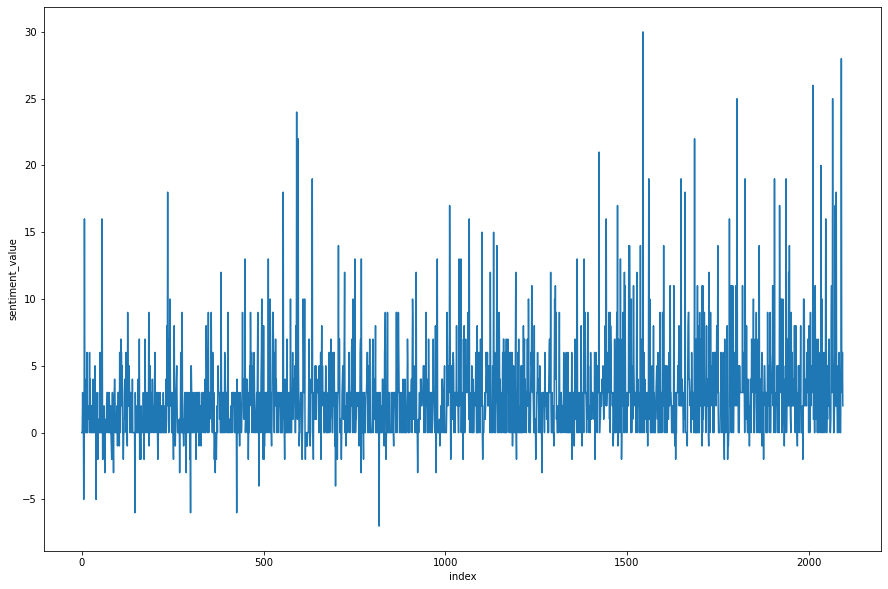

In [54]:
plt.figure(figsize=(15,10))
sns.lineplot(y='sentiment_value',x='index',data=sent_df)